In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pca import PCA

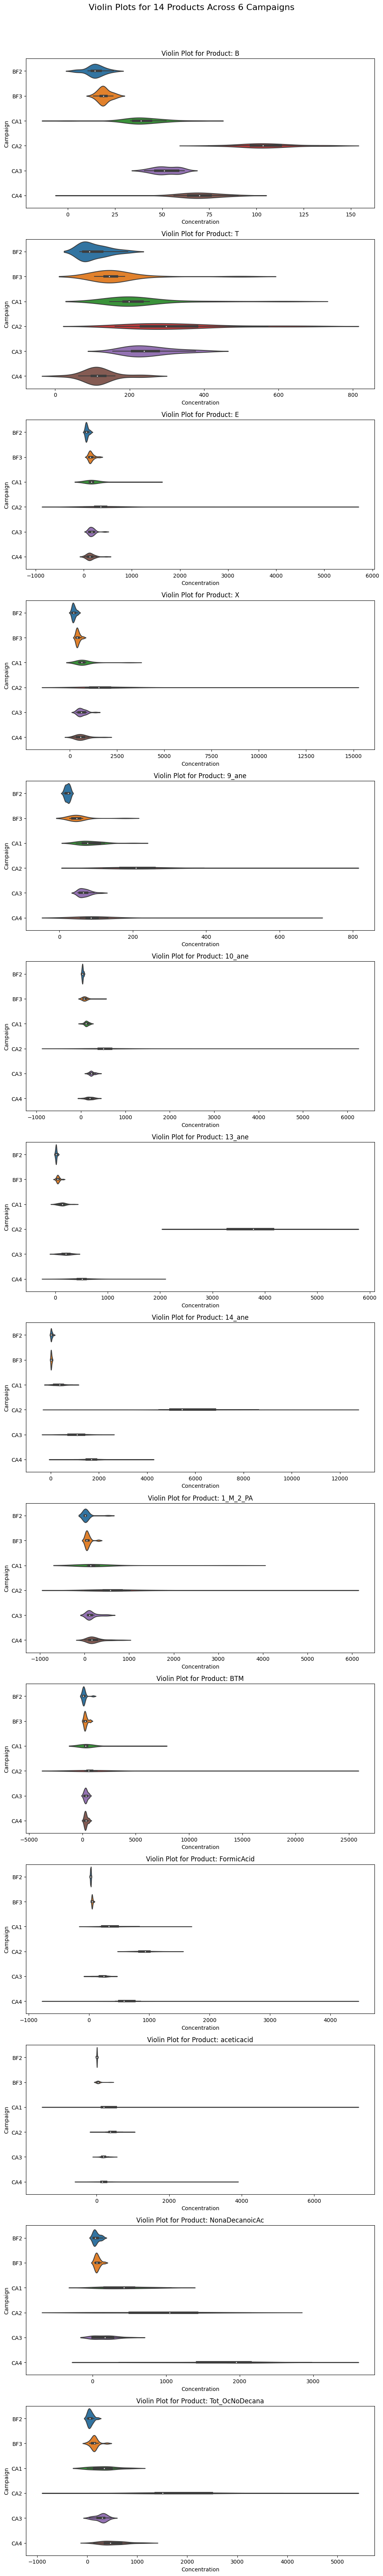

In [2]:
# Load your data
file_path = 'TP4_covC1234_DS19_20 (1).xlsx'  # Replace with your file path
data = pd.read_excel(file_path)
# Select columns for plotting (excluding non-numeric and specific columns)
plot_columns = data.columns[1:-4]  # Adjust indices as needed
selected_products = plot_columns[:14]  # Selecting the first 14 products

# Extracting unique campaigns
unique_campaigns = data['Campagne'].unique()
selected_campaigns = unique_campaigns[:6]  # Selecting the first 6 campaigns

# Creating subplots
num_products = 14
fig, axes = plt.subplots(num_products, 1, figsize=(10, num_products * 5))

# Plotting violin plots for each product and campaign
for i, product in enumerate(selected_products):
    sns.violinplot(data=data, x=product, y='Campagne', order=selected_campaigns, ax=axes[i])
    axes[i].set_title(f"Violin Plot for Product: {product}")
    axes[i].set_xlabel("Concentration")
    axes[i].set_ylabel("Campaign")

# Adjusting layout
fig.suptitle('Violin Plots for 14 Products Across 6 Campaigns', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])

# Show the plot
plt.show()



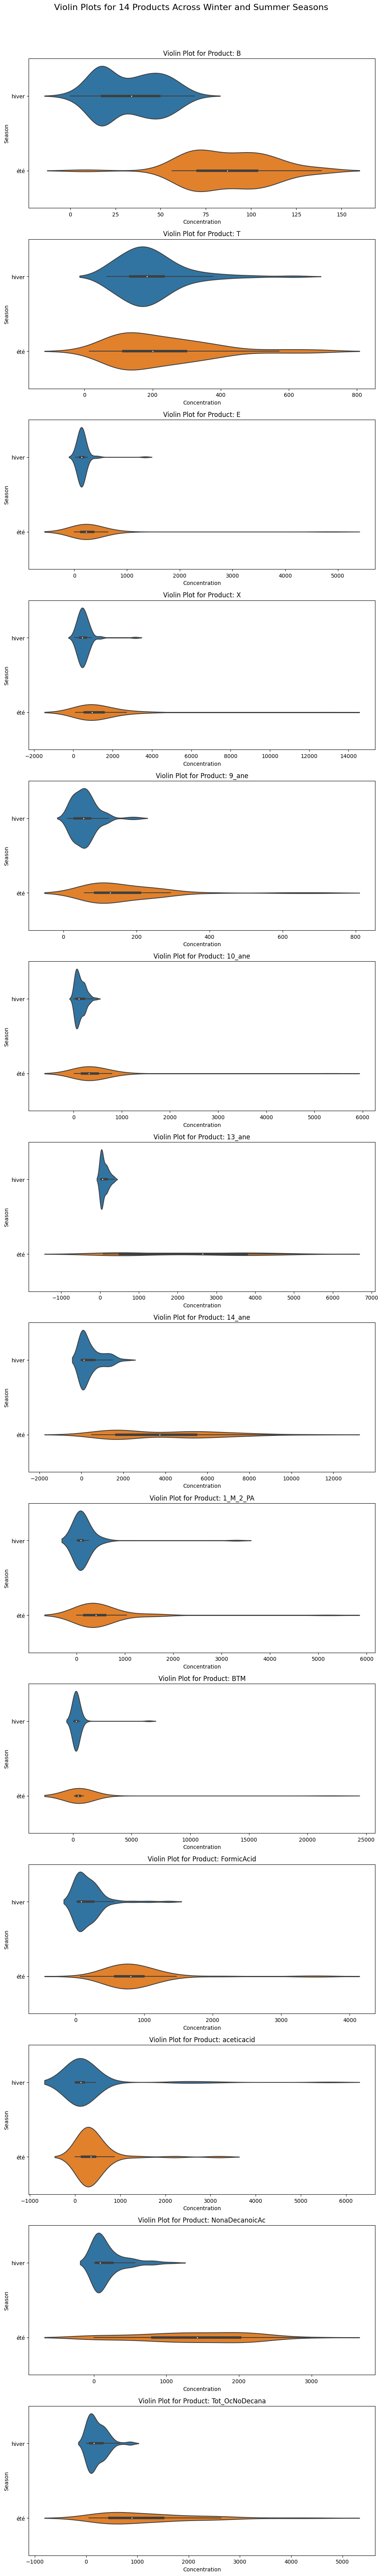

In [3]:
# Select columns for plotting (excluding non-numeric and specific columns)
plot_columns = data.columns[1:-4]  # Adjust indices as needed
selected_products = plot_columns[:14]  # Selecting the first 14 products

# Seasons to consider
seasons = ['hiver', 'été']

# Creating subplots
num_products = 14
fig, axes = plt.subplots(num_products, 1, figsize=(10, num_products * 5))

# Plotting violin plots for each product and season
for i, product in enumerate(selected_products):
    sns.violinplot(data=data, x=product, y='SAISON', order=seasons, ax=axes[i])
    axes[i].set_title(f"Violin Plot for Product: {product}")
    axes[i].set_xlabel("Concentration")
    axes[i].set_ylabel("Season")

# Adjusting layout
fig.suptitle('Violin Plots for 14 Products Across Winter and Summer Seasons', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])

# Show the plot
plt.show()

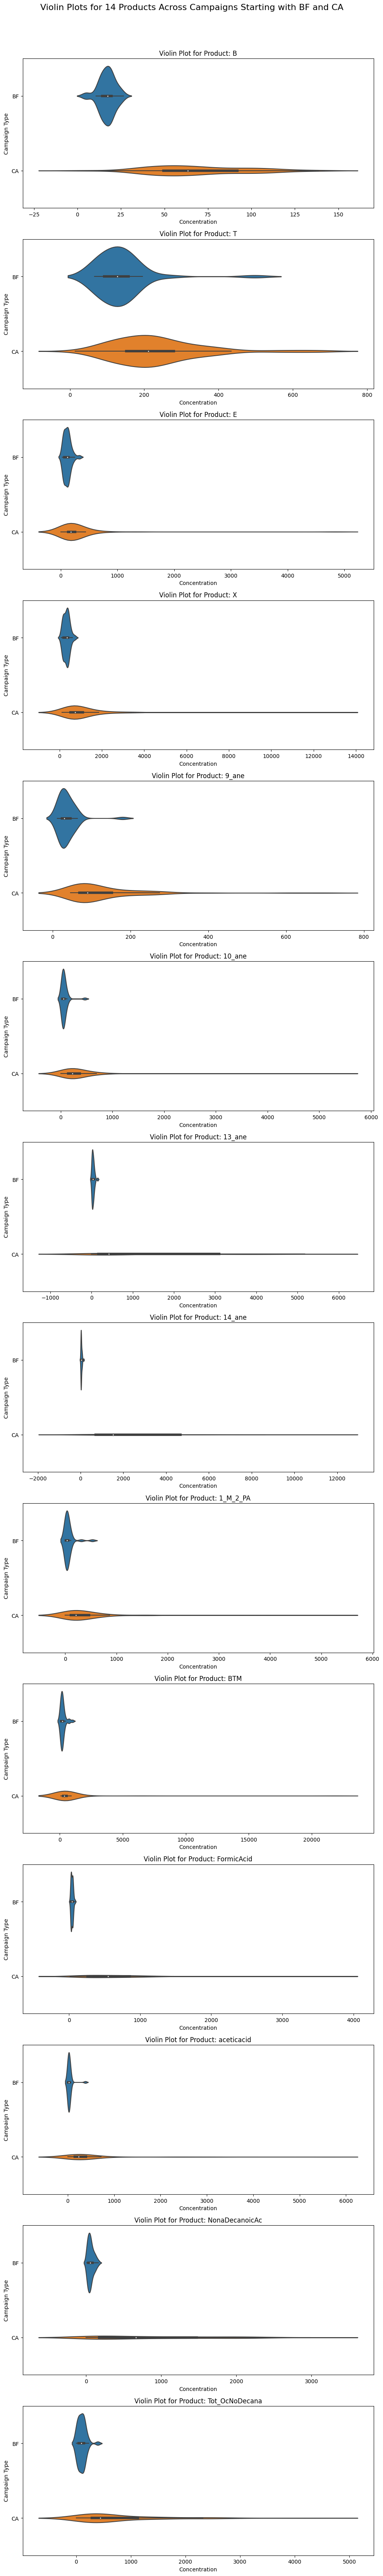

In [4]:
# Creating 14 plots for the first 14 products, each plot containing 2 violin plots for campaigns starting with 'BF' and 'CA'

# Filtering campaigns starting with 'BF' and 'CA'
bf_campaigns = data[data['Campagne'].str.startswith('BF')]
ca_campaigns = data[data['Campagne'].str.startswith('CA')]

# Creating a new DataFrame combining both BF and CA campaigns
combined_campaigns = pd.concat([bf_campaigns, ca_campaigns])
combined_campaigns['Campaign_Type'] = combined_campaigns['Campagne'].apply(lambda x: 'BF' if x.startswith('BF') else 'CA')

# Creating subplots
fig, axes = plt.subplots(14, 1, figsize=(10, 70))

# Plotting violin plots for each product and campaign type
for i, product in enumerate(selected_products):
    sns.violinplot(data=combined_campaigns, x=product, y='Campaign_Type', ax=axes[i])
    axes[i].set_title(f"Violin Plot for Product: {product}")
    axes[i].set_xlabel("Concentration")
    axes[i].set_ylabel("Campaign Type")

# Adjusting layout
fig.suptitle('Violin Plots for 14 Products Across Campaigns Starting with BF and CA', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])

# Show the plot
plt.show()


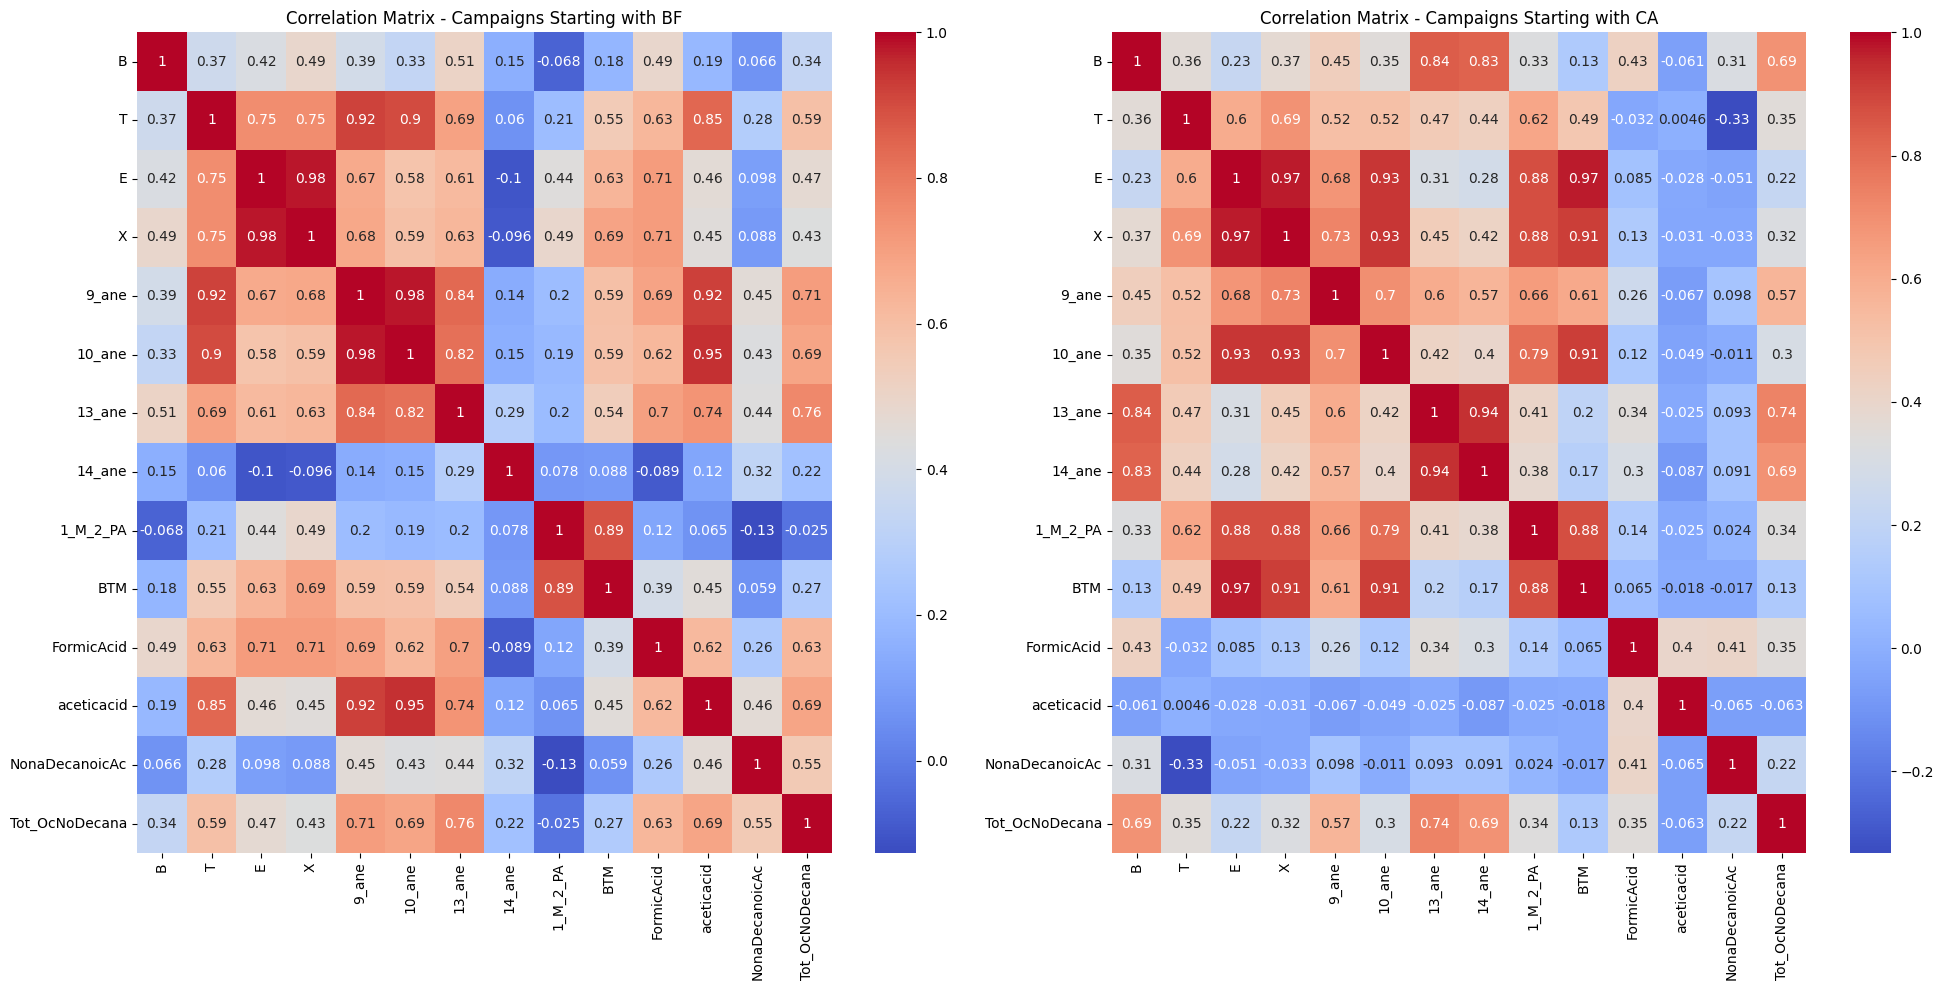

In [8]:
# Filter the dataset for BF and CA campaigns
bf_data = data[data['Campagne'].str.startswith('BF')]
ca_data = data[data['Campagne'].str.startswith('CA')]

# Calculate the correlation matrices
correlation_matrix_bf = bf_data[selected_products].corr()
correlation_matrix_ca = ca_data[selected_products].corr()

# Creating subplots for the two heatmaps
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# BF Correlation Heatmap
sns.heatmap(correlation_matrix_bf, annot=True, cmap='coolwarm', ax=ax[0])
ax[0].set_title('Correlation Matrix - Campaigns Starting with BF')

# CA Correlation Heatmap
sns.heatmap(correlation_matrix_ca, annot=True, cmap='coolwarm', ax=ax[1])
ax[1].set_title('Correlation Matrix - Campaigns Starting with CA')

# Adjusting layout
plt.tight_layout()

# Show the plot
plt.show()

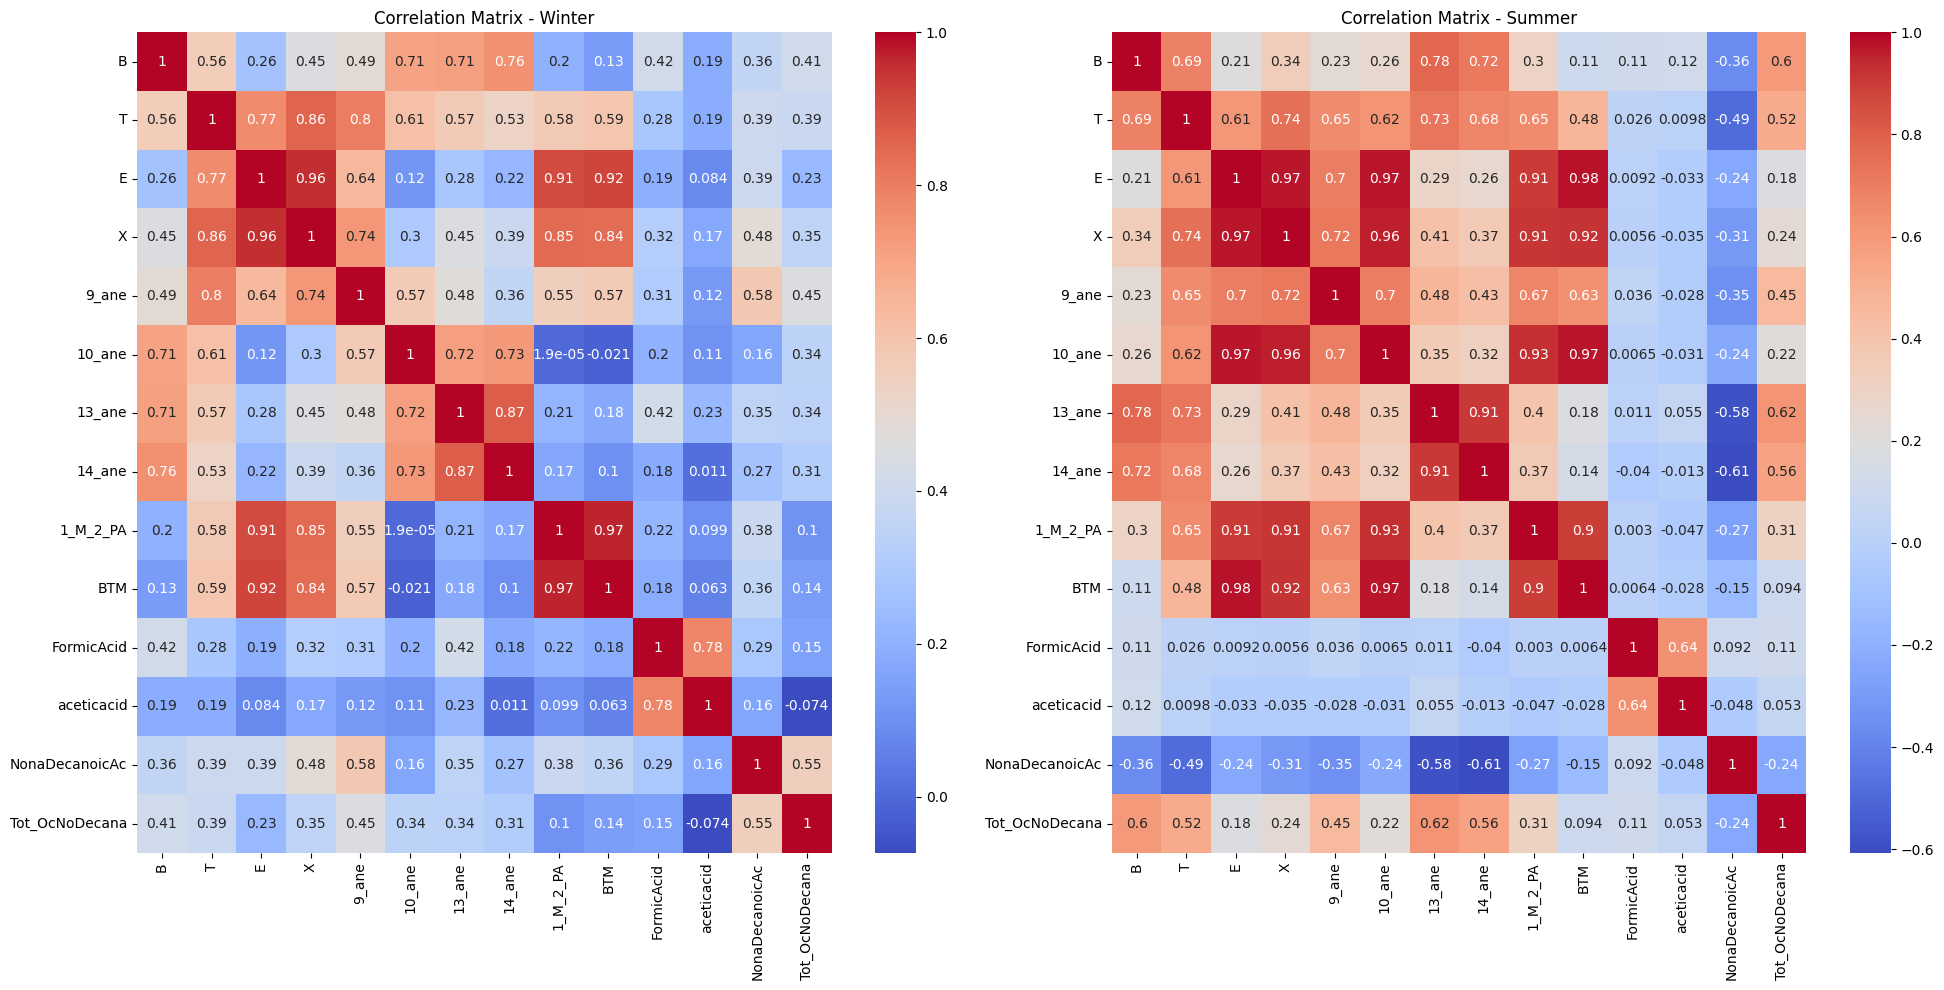

In [9]:
# Filter the dataset for Winter and Summer seasons
winter_data = data[data['SAISON'] == 'hiver']
summer_data = data[data['SAISON'] == 'été']

# Calculate the correlation matrices
correlation_matrix_winter = winter_data[selected_products].corr()
correlation_matrix_summer = summer_data[selected_products].corr()

# Creating subplots for the two heatmaps
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Winter Correlation Heatmap
sns.heatmap(correlation_matrix_winter, annot=True, cmap='coolwarm', ax=ax[0])
ax[0].set_title('Correlation Matrix - Winter')

# Summer Correlation Heatmap
sns.heatmap(correlation_matrix_summer, annot=True, cmap='coolwarm', ax=ax[1])
ax[1].set_title('Correlation Matrix - Summer')

# Adjusting layout
plt.tight_layout()

On voir que les passages hiver-été Ac-BF fait évoluer les corrélations ce qui peut indiquer un impact lié à ces changements. Il y a cependant un biaias dont il faut être conscient car dans les données BF il n'y a que des hivers. Ainsi l'impact de l'usine peut être dur a distinquer de celui de l'été. 
Pour metre en évidence ces évolutions il faut regarder la diference entre les deux cartes de chaleurs. 

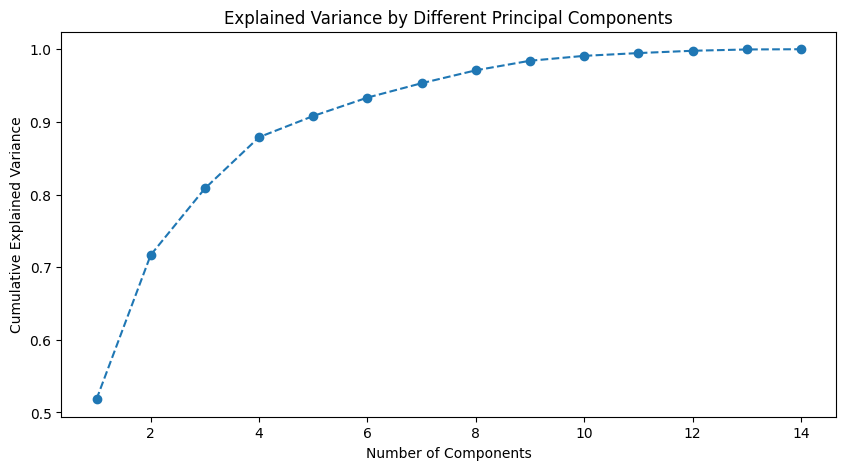

In [13]:
# Extracting the relevant data
X = data[selected_products].to_numpy()

# Standardizing the data (mean=0, variance=1)
X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Applying PCA
pca = PCA()
pca.fit(X_standardized)

# Extracting eigenvalues and eigenvectors
eigenvalues = pca.eigenvalues
eigenvectors = pca.eigenvectors

# Calculating explained variance ratio (inertia)
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plotting the explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.show()

# The above plot will help in deciding the number of components to retain based on the cumulative explained variance.

# If needed, project the data onto the principal components
# For example, projecting onto the first two components
projected_data = X_standardized @ eigenvectors[:, :2]


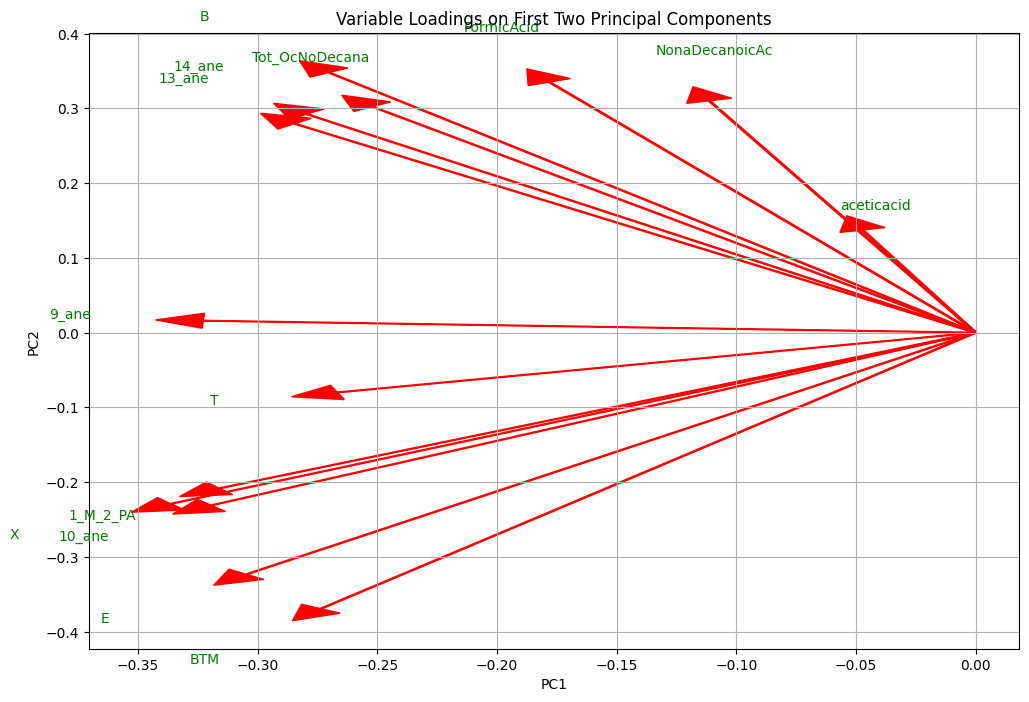

In [14]:
# Creating a biplot
plt.figure(figsize=(12, 8))

# Plotting the loadings for the first two components
for i in range(len(selected_products)):
    plt.arrow(0, 0, eigenvectors[i, 0], eigenvectors[i, 1], head_width=0.02, head_length=0.02, color='r')
    plt.text(eigenvectors[i, 0]*1.2, eigenvectors[i, 1]*1.2, selected_products[i], color='g')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Variable Loadings on First Two Principal Components')
plt.grid()

# Show the plot
plt.show()

les variables les moins expliqué par les nouvelles données porjetés correspondent aux fleches les plus courtes. en effet ce sont celle qui impacte le moins les premiers 70% de la variance. Le dessin montre bien quelles variables sont regroupées dans les deux premieres composantes

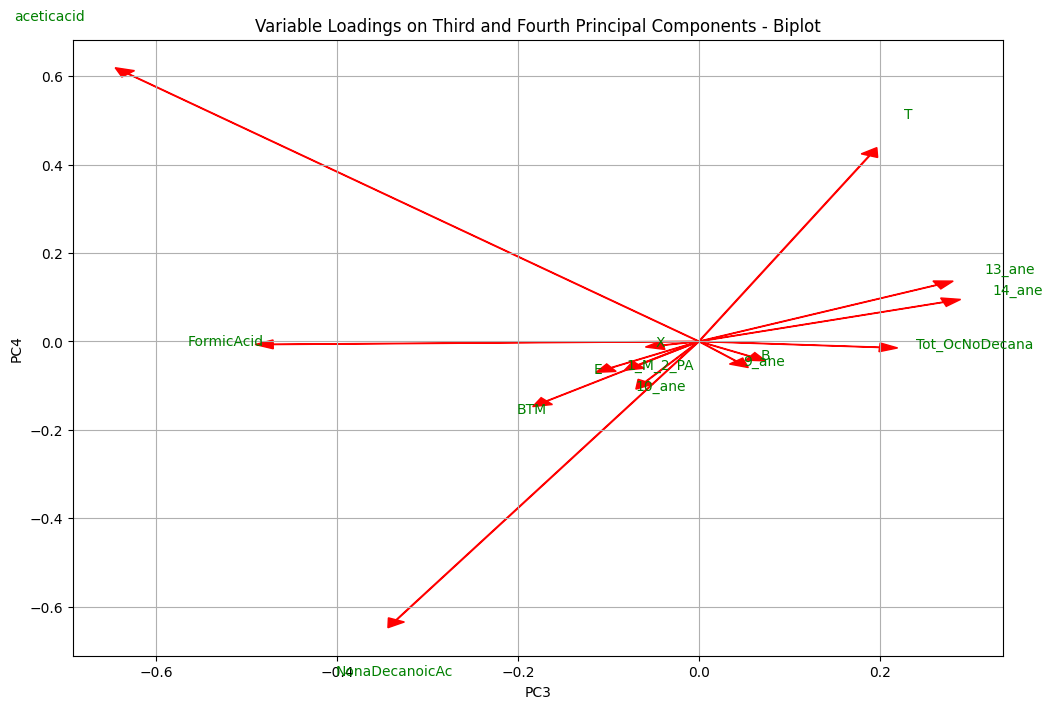

In [15]:
# Generating a biplot for the third and fourth principal components to visualize groups of variables

plt.figure(figsize=(12, 8))

# Plotting the loadings for the third and fourth components
for i in range(len(selected_products)):
    plt.arrow(0, 0, eigenvectors[i, 2], eigenvectors[i, 3], head_width=0.02, head_length=0.02, color='r')
    plt.text(eigenvectors[i, 2]*1.2, eigenvectors[i, 3]*1.2, selected_products[i], color='g')

plt.xlabel('PC3')
plt.ylabel('PC4')
plt.title('Variable Loadings on Third and Fourth Principal Components - Biplot')
plt.grid()

# Show the plot
plt.show()

# This biplot shows the relationships between variables in the space defined by the third and fourth principal components.


En examinant les troisième et quatrième composantes principales, l'acide acétique ('aceticacid') ressort comme significatif, contrairement à son impact moindre dans les deux premières composantes. Cette particularité met en lumière son rôle important dans la distinction des changements saisonniers et des effets de l'activité industrielle, soulignant ainsi l'importance d'analyser les composantes au-delà des deux premières pour une compréhension complète des données. ( c'est une facon d'essayer de donner un sens aux composantes)

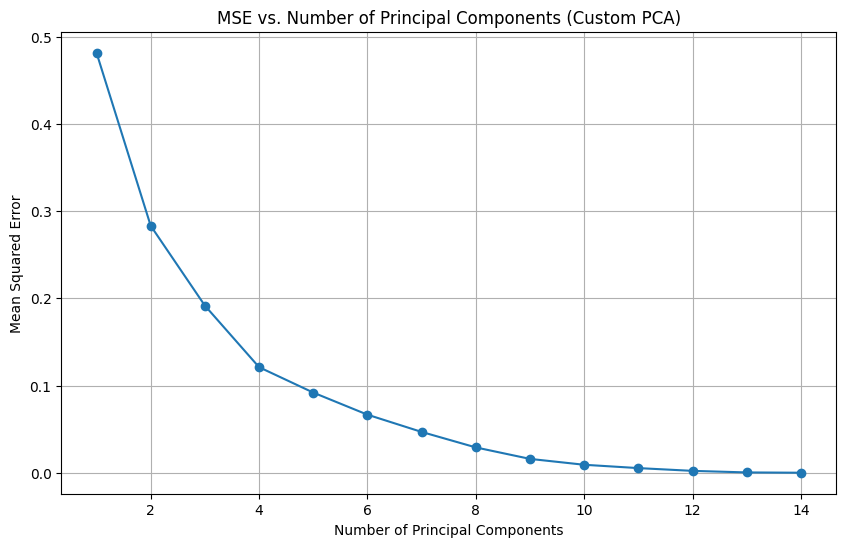

In [16]:
# Calculating the Mean Squared Error (MSE) for projections with varying number of principal components using the custom PCA library

mse_values_custom_pca = []

# Looping over the number of components
for num_components in range(1, 15):
    # Projecting the data onto 'num_components' principal components using the custom PCA library
    projected_data_custom_pca = X_standardized @ eigenvectors[:, :num_components]

    # Reconstructing the data from the projections
    reconstructed_data_custom_pca = projected_data_custom_pca @ eigenvectors[:, :num_components].T

    # Calculating MSE
    mse_custom_pca = np.mean((X_standardized - reconstructed_data_custom_pca) ** 2)
    mse_values_custom_pca.append(mse_custom_pca)

# Plotting the MSE values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), mse_values_custom_pca, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Number of Principal Components (Custom PCA)')
plt.grid()
plt.show()

# This plot, using the custom PCA library, shows how the reconstruction error (MSE) changes as we increase the number of principal components used for projection.


L'analyse de la courbe de l'erreur quadratique moyenne (MSE) montre une diminution significative de l'erreur à mesure que le nombre de composantes principales augmente, indiquant une bonne projection des individus dans l'espace réduit. L'aplatissement de la courbe après 4 suggère que l'ajout de composantes supplémentaires apporte peu d'informations additionnelles. Cette tendance indique que les individus sont bien projetés avec un nombre optimal de composantes, offrant un équilibre entre réduction de dimensionnalité et conservation des informations essentielles.

In [17]:
first_eigenvector = eigenvectors[:, 0]
normalized_first_eigenvector = first_eigenvector / np.sum(first_eigenvector)
normalized_first_eigenvector

array([0.07585242, 0.07486397, 0.08552949, 0.09438937, 0.09058959,
       0.08964162, 0.07988316, 0.0784575 , 0.0886889 , 0.07680019,
       0.05001027, 0.01327339, 0.03125296, 0.07076717])

L'analyse du premier vecteur propre normalisé révèle que les variables 3, 4, 5, 6 et 9 sont les plus influentes pour la première composante principale, étant donné qu'elles présentent les coefficients les plus élevés. Cette observation coïncide avec les résultats des cartes de chaleur de la corrélation, où ces mêmes variables se distinguent par leurs niveaux de corrélation plus extrêmes. Cela suggère que la première composante principale tend à accorder une plus grande importance aux variables ayant les corrélations les plus fortes, qu'elles soient positives ou négatives, dans l'ensemble des données. Cette tendance indique que la première composante principale capte les aspects les plus saillants de la variabilité dans les données, en particulier ceux associés aux variables les plus expressives en termes de corrélation.

L'ACP a permis d'identifier des variables clés qui contribuent significativement aux premières composantes principales. Ces variables pourraient servir de "marqueurs" pour différencier les périodes. Si l'acp ne donne pas directment une signature pour chaque periode car elle n'a pas de vision sur ces periodes, elle aiguille sur les axes de recherche utils pour la trouver. A la limite faire une acp pour chaque periode pourraient nous amener a constater une évolution des composantes principes et donc une "signature". Les variables 3, 4, 5, 6 et 9 sont les plus mises en avant par la première composantes, on peut donc les considerer comme marqueurs